# Example model analysis



In [1]:
import json, glob, os, sys
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sys.path.append(CODE) # set sys.path in order to load modules
from calc_util import sliding_maxnorm_ht
from adaint import integrate, default_steps_per_time, integrate2
import system #,container, setup
from scipy.integrate import odeint

#sns.set(style="white") fv 

In [17]:
def f(X, t, S, kIa1, kIi1, kMa1, kMi1, kRa1, kRi1, K_1, kIa2, kIi2, kMa2, kMi2, kRa2, kRi2, K_2): 
    # starting values 
    I1, M1, R1, I2, M2, R2 = X
    # ODEs
    dI1 = S*kIa1*(1.0-I1) - kIi1*I1
    dM1 = I1*kMa1*(1.0-M1) - kMi1*M1
    dR1 = I1*kRa1*(1.0-R1) - M1*kRi1*R1/(K_1+R1)
    dI2 = R1*kIa2*(1.0-I2) - kIi2*I2
    dM2 = I2*kMa2*(1.0-M2) - kMi2*M2
    dR2 = I2*kRa2*(1.0-R2) - M2*kRi2*R2/(K_2+R2)

    return(dI1, dM1, dR1, dI2, dM2, dR2)


In [18]:
p0=[ 0.023, 34.44, 17.7071, 0.038241, 57.9236, 1.39117, 0.000534, 
            0.016011, 14.3342,  4.33609, 0.001471, 26.1702, 45.9986, 0.79082] #only rates and ODE parameters
Ton= 1.1111111111111112
Amin=0

X0 = [0,0,0,0,0,0] 

labels=[r"$I_1$", r"$M_1$", r"$R_1$", r"$I_2$", r"$M_2$", r"$R_2$"] #should match order in X0

mys = system.System(f,p0, X0,output_var_idx=-1,steps_per_time=100,hmax=0)

for ht threshold 0.01, and T=15, habituation time is ht=13 stimuli, and recovery=1318.14 t.u.
for ht threshold 0.01, and T=20, habituation time is ht=15 stimuli, and recovery=1566.13 t.u.
for ht threshold 0.01, and T=25, habituation time is ht=20 stimuli, and recovery=1801.34 t.u.


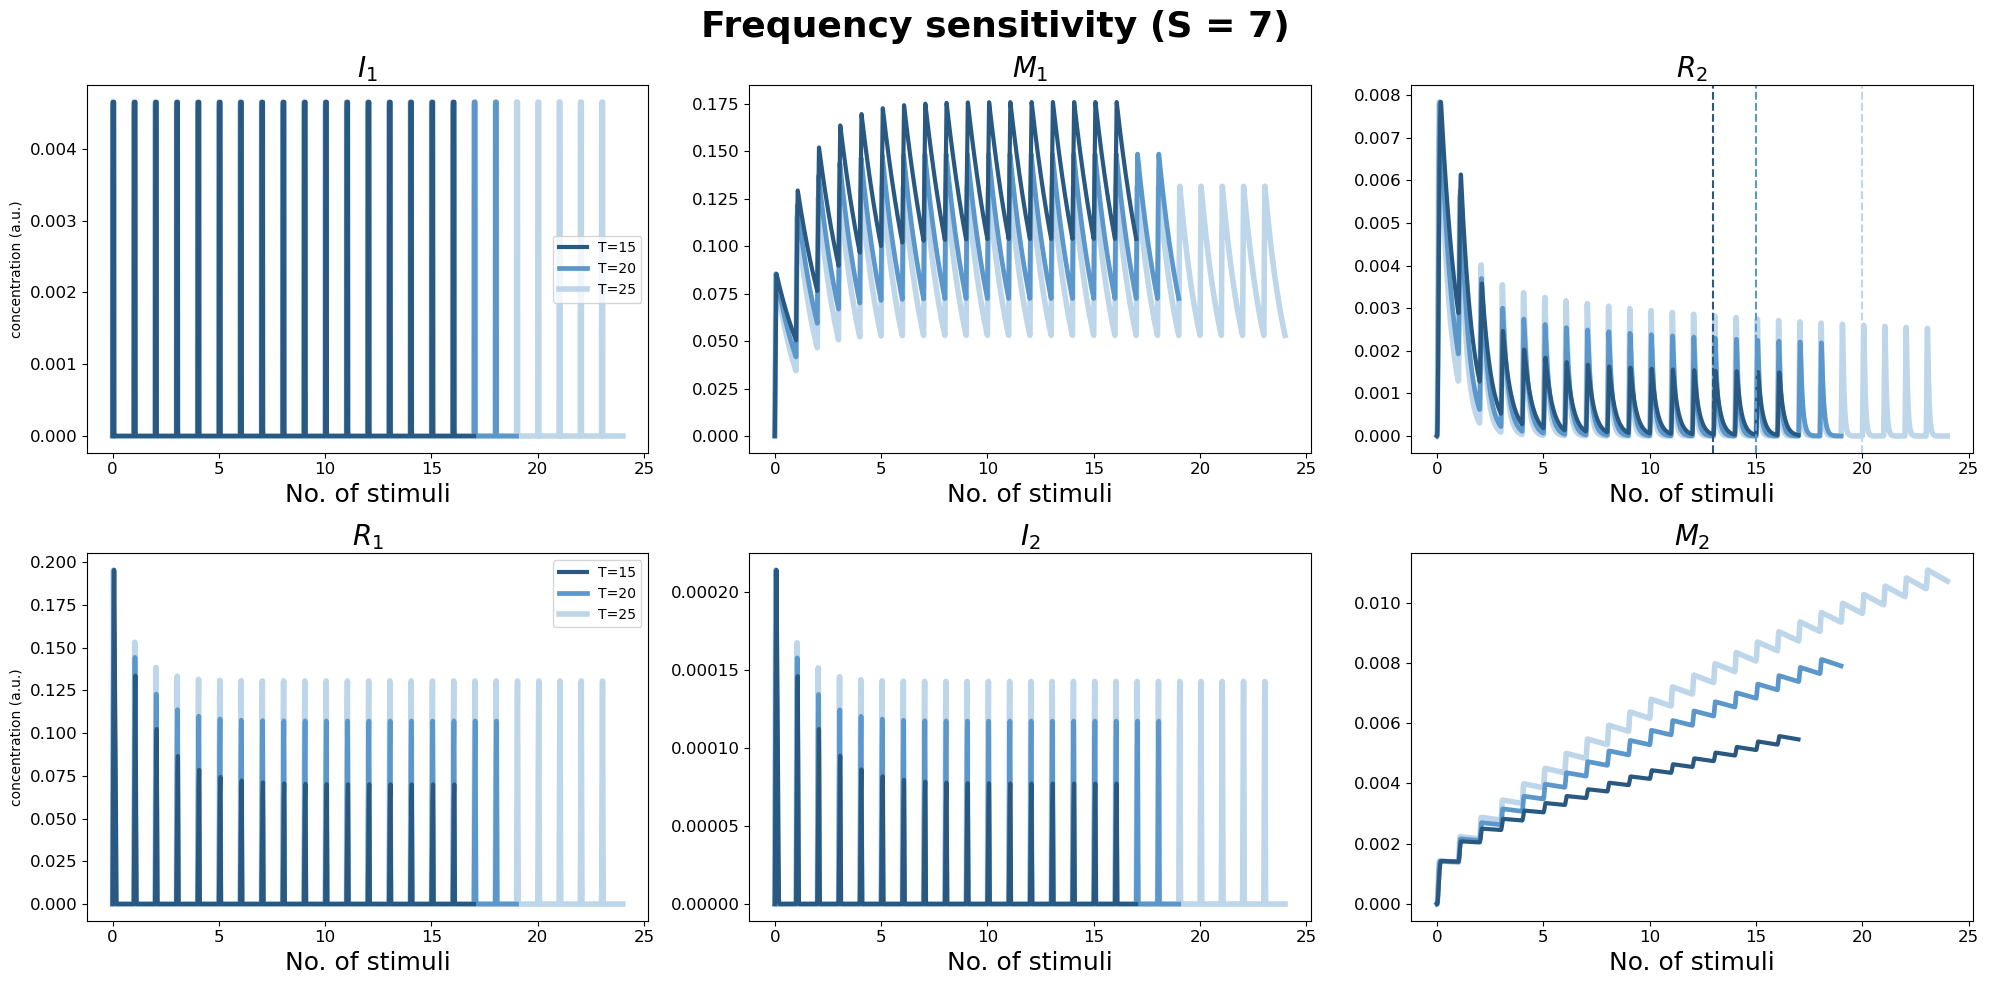

In [22]:

S=7
T_scan_set = [15, 20, 25]
for ht_threshold in [0.01]:
    traj = []
    tvecs = []
    ht = []
    rt=[]
    for j, T in enumerate(T_scan_set): 
        ht_,rt_=mys.compute(T=T,Ton=Ton,Amin=Amin,Amax=S,ht_threshold=ht_threshold,recovery_threshold=0.95)
        ht.append(ht_)
        rt.append(rt_)
        traj.append(mys.computational_data["trajectory"])
        tvecs.append(mys.computational_data["tvec"])
        
        print("for ht threshold %g, and T=%d, habituation time is ht=%d stimuli, and recovery=%g t.u."%(ht_threshold,T,ht_,rt_))
        
    
    plot=True
    if plot:
        # overlay plot for frequency sensitivity
        colors = ['#295981', '#5b97ca', '#bed6ea']
        lw = [2*1.5,2*1.7,2*2]
        al = [1.0,1.0,1.0]

        fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))

        for j,T in enumerate(T_scan_set):
            y = traj[j]
            tvec = tvecs[j]/T #plot with respect to stimulus number rather than time
            for k in range(0,6):
                #order of variables is #Rr, Ri, I2, M2, R2, Ra . We want to plot Rr, Ri, Ra // I2, M2, R2
                if k==0:
                    ax=axes[0][0]
                elif k==1:
                    ax=axes[0][1]
                elif k==2:
                    ax=axes[1][0] 
                elif k==3:
                    ax=axes[1][1]
                elif k==4:
                    ax=axes[1][2]
                elif k==5:
                    ax=axes[0][2]
                    ax.axvline(x=ht[j],linestyle="--",color=colors[j])
                ax.set_title(labels[k], fontsize=20)
                ax.plot(tvec, y[:,k], color=colors[j], lw=lw[j], alpha=al[j],label="T=%d"%T,zorder=(2-j))


                ax.set_xlabel('No. of stimuli', fontsize=18)
                ax.xaxis.set_tick_params(labelsize=12)
                ax.yaxis.set_tick_params(labelsize=12)

                if ax==axes[0][0] or ax==axes[1][0]:
                    ax.set_ylabel('concentration (a.u.)')
                    ax.legend()
        #sns.despine()
        fig.suptitle('Frequency sensitivity (S = %d)'%S,  fontweight="bold", fontsize=26)
        plt.tight_layout()
        plt.show()

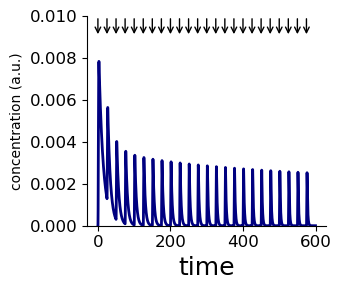

In [87]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.5,3))
j=2
T=T_scan_set[j]

y = traj[j]
tvec = tvecs[j]#/T #plot with respect to stimulus number rather than time
#for k in range(0,6):
k=5

#ax.axvline(x=ht[j],linestyle="--",color=colors[j])
#ax.set_title(labels[k], fontsize=20)
ax.plot(tvec, y[:,k], color="navy", lw=2, alpha=al[j],label="T=%d"%T,zorder=(2-j))

ax.set_xlabel('time', fontsize=18)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

ax.set_ylabel('concentration (a.u.)')
ax.spines[['right', 'top']].set_visible(False)
#ax.arrow(0,1,2,2,length_includes_head=True,head_width=5,head_length=5)
t_stimuli=np.arange(0,tvec[-1],T)
for t in t_stimuli:
    ax.annotate("", xy=(t, 0.009), xytext=(t, 0.01),arrowprops=dict(arrowstyle="->"))
ax.set_ylim(0,0.01)
plt.tight_layout()
plt.show()